In [ ]:
from keras.datasets import mnist
import tensorflow as tf
#download mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

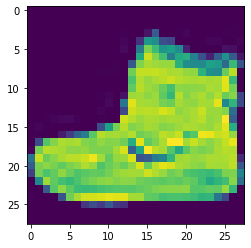

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(x_train[0])

In [ ]:
#check image shape
x_train.shape

(60000, 28, 28)

In [ ]:
#reshape data to fit model
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.33, random_state = 0)

In [ ]:
#train the model
model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 4ms/step - loss: 1.7201 - accuracy: 0.7991 - val_loss: 0.4202 - val_accuracy: 0.8521
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3287 - accuracy: 0.8814 - val_loss: 0.3711 - val_accuracy: 0.8691
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9032 - val_loss: 0.3725 - val_accuracy: 0.8712
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2354 - accuracy: 0.9124 - val_loss: 0.3744 - val_accuracy: 0.8773
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9227 - val_loss: 0.3862 - val_accuracy: 0.8788
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1822 - accuracy: 0.9334 - val_loss: 0.4037 - val_accuracy: 0.8858
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1647 - accuracy: 0.9383 - val_loss: 0.4741 - val_accuracy

In [ ]:
#predict images in the test set
model = model.predict(x_test)

In [ ]:
#if the predicted model has a value greater than 0.5, then it will be converted to int 1 or so if it's lesser it will become 0
prediction = (model > 0.5).astype(int)
prediction

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#actual results for the images in test set
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

#Therefore the accuracy of this training model is 87%

0.873731343283582